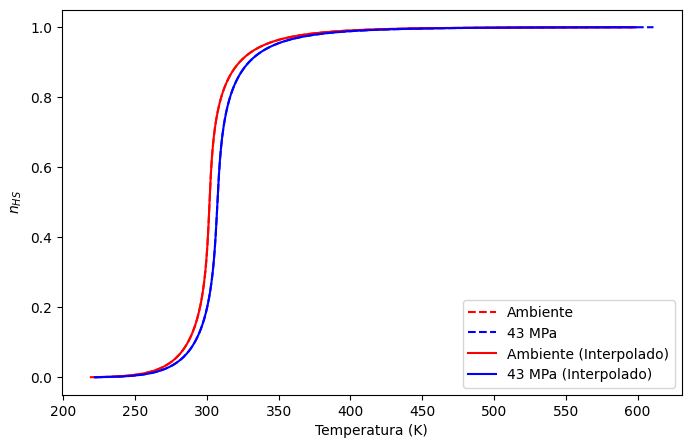

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Parâmetros
g = 871 # Adimensional
T_0 = 266 # Em Kelvin
#T_0 = 262
Delta_0 = 2043 # Em Kelvin
delta_V = 48e-30 # A unidade dá em metros ao cubo.
k_B = 1.380649e-23 # Em J/K

def T(m, delta_0, delta_V, P, g, T0):
#    P_linha = (((delta_V)**(1/3)) * P) / 4
    P_linha = (((delta_V) * P)) / 4
    #gamma = (k_B * delta_0 + P_linha * (delta_V**3)) / (k_B * T0)
    gamma = (delta_0 + P_linha/k_B) / (T0)
    numerator = 2 * (m - gamma)
    denominator = np.log((m + 1) / (g**2 * (1 - m)))
    return T0 * (numerator / denominator)

# Varredura original em m
m_amb = np.linspace(-0.999, 0.999, 10000)
m_43MPa = np.linspace(-0.999, 0.999, 10000)

Temp_amb = T(m_amb, Delta_0, delta_V, 101325, g, T_0)
Temp_43MPa = T(m_43MPa, Delta_0, delta_V, 43e6, g, T_0)

n_hs_amb = (m_amb + 1) / 2
n_hs_43MPa = (m_43MPa + 1) / 2

# Define um grid comum de temperatura (exemplo: de 1K a 300K)
T_min = max(np.min(Temp_amb), np.min(Temp_43MPa))
T_max = min(np.max(Temp_amb), np.max(Temp_43MPa))
T_common = np.linspace(T_min, T_max, 1000)

# Interpolação para obter n_hs em T_common
n_hs_amb_interp = np.interp(T_common, Temp_amb, n_hs_amb)
n_hs_43MPa_interp = np.interp(T_common, Temp_43MPa, n_hs_43MPa)

m_amb = np.linspace(-0.999, 0.999, 10000)
m_43MPa = np.linspace(-0.999, 0.999, 10000)

Temp_amb = T(m_amb, Delta_0, delta_V, 101325, g, T_0)
Temp_43MPa = T(m_43MPa, Delta_0, delta_V, 43e6, g, T_0)
n_hs_amb = (m_amb + 1) / 2
n_hs_43MPa = (m_43MPa + 1) / 2


# Plot
plt.figure(figsize=(8,5))

plt.plot(Temp_amb, n_hs_amb, label='Ambiente',linestyle='--',color='red')
plt.plot(Temp_43MPa, n_hs_43MPa, label='43 MPa',linestyle='--',color='blue')

plt.plot(T_common, n_hs_amb_interp, label='Ambiente (Interpolado)',color='red')
plt.plot(T_common, n_hs_43MPa_interp, label='43 MPa (Interpolado)',color='blue')


plt.xlabel('Temperatura (K)')
plt.ylabel(r'$n_{HS}$')
plt.legend()
plt.show()


A temperatura em que ocorre o máximo é: 301.8785479151484


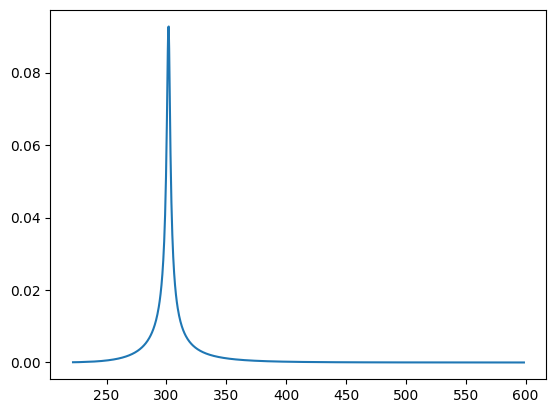

In [50]:
dn_dT = np.gradient(n_hs_amb_interp, T_common)

plt.plot(T_common, dn_dT)

id_max = np.argmax(dn_dT)
print("A temperatura em que ocorre o máximo é:",T_common[id_max])

In [51]:
def S_S(T, g_J, J, B):
    """
    Calcula a entropia magnética (em J/mol·K) de um paramagneto ideal de spin J.

    Entradas:
    - T : Temperatura (K)
    - g_J : Fator de Landé
    - J : Momento total de spin
    - B : Campo magnético (Tesla)

    Saída:
    - S : Entropia (J/mol·K)
    """
    k_B = 1.380649e-23      # J/K
    mu_B = 9.2740100783e-24 # J/T
    R = 8.314462618         # J/mol·K

    x = (g_J * mu_B * J * B) / (k_B * T)

    num = np.sinh((2 * J + 1) * x / (2 * J))
    den = np.sinh(x / (2 * J))
    Z = num / den

    coeff = (2 * J + 1) / (2 * J)
    B_J = (coeff / np.tanh(coeff * x)) - (1 / (2 * J * np.tanh(x / (2 * J))))

    S = R * (np.log(Z) + x * B_J)
    return S


def T(m, delta_0, delta_V, P, g, T0):
#    P_linha = (((delta_V)**(1/3)) * P) / 4
    P_linha = (((delta_V) * P)) / 4
    #gamma = (k_B * delta_0 + P_linha * (delta_V**3)) / (k_B * T0)
    gamma = (delta_0 + P_linha/k_B) / (T0)
    numerator = 2 * (m - gamma)
    denominator = np.log((m + 1) / (g**2 * (1 - m)))
    return T0 * (numerator / denominator)

# Varredura original em m
m_amb = np.linspace(-0.999, 0.999, 10000)
m_2kbar = np.linspace(-0.999, 0.999, 10000)

Temp_amb = T(m_amb, Delta_0, delta_V, 101325, g, T_0)
Temp_2kbar = T(m_2kbar, Delta_0, delta_V, 200e6, g, T_0)

n_hs_amb = (m_amb + 1) / 2
n_hs_2kbar = (m_2kbar + 1) / 2

# Define um grid comum de temperatura (exemplo: de 1K a 300K)
T_min = max(np.min(Temp_amb), np.min(Temp_2kbar))
T_max = min(np.max(Temp_amb), np.max(Temp_2kbar))
T_common = np.linspace(T_min, T_max, 1000)

# Interpolação para obter n_hs em T_common
n_hs_amb_interp = np.interp(T_common, Temp_amb, n_hs_amb)
n_hs_2kbar_interp = np.interp(T_common, Temp_2kbar, n_hs_2kbar)

m_amb = np.linspace(-0.999, 0.999, 10000)
m_2kbar = np.linspace(-0.999, 0.999, 10000)

Temp_amb = T(m_amb, Delta_0, delta_V, 101325, g, T_0)
Temp_2kbar = T(m_2kbar, Delta_0, delta_V, 200e6, g, T_0)
n_hs_amb = (m_amb + 1) / 2
n_hs_2kbar = (m_2kbar + 1) / 2

S_S_amb = n_hs_amb_interp*S_S(T_common, 2, 2,1)
S_S_2kbar = n_hs_2kbar_interp*S_S(T_common, 2, 2,1)

delta_S_Spin = -(S_S_2kbar - S_S_amb)

id_max = np.argmax(delta_S_Spin)
print("O valor máximo da variação de entropia é:", max(delta_S_Spin))
print("A temperatura em que ocorre o máximo é:",T_common[id_max])

O valor máximo da variação de entropia é: 9.397316714469667
A temperatura em que ocorre o máximo é: 313.1410744500218
